**Importing libraries**

In [52]:
import pandas as pd 
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

## Method 1 : Variance Threshold 

To remove columns with very less variance (similar values)

In [202]:
df1 = pd.read_csv('santander.csv', nrows=10000)

In [203]:
df1.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [204]:
X1 = df1.drop('TARGET', axis=1)
y1 = df1['TARGET']

In [205]:
# Performing train test Split 

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [206]:
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(7000, 370) (3000, 370) (7000,) (3000,)


**Applying Variance Threshod**

We are going to keep the threshold as zero for our example (also the default value)

We can change it according to the problem

In [246]:
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(X_train1)

VarianceThreshold(threshold=0)

In [247]:
## get_support() function gives the columns as True -> having greater variance hen threshold
## and False -> having lower variance then threshold

sum(var_thres.get_support())

284

We have 284 columns with variance greater then zero

In [209]:
## Identifying the columns with zero variance

cons_colms = [column for column in X_train1.columns 
             if column not in X_train1.columns[var_thres.get_support()]]
cons_colms

['ind_var2_0',
 'ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_out_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_var7_emit_ult1',
 

In [210]:
len(X_train1.columns[var_thres.get_support()])

284

In [213]:
## Dropping the columns with zero variance from the train dataset
## Same can be done from the test dataset also

X_train1 = X_train1.drop(cons_colms, axis=1)

In [214]:
X_train1.shape

(7000, 284)

## Pearson Correlation

To remove the features which are highly correlated

In [215]:
from sklearn.datasets import load_boston

In [216]:
data = load_boston()

In [217]:
df2 = pd.DataFrame(data.data, columns=data.feature_names)

## Adding the target column
df2['MEDV'] = data.target

In [218]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [220]:
X2 = df2.drop('MEDV', axis=1)
y2 = df2['MEDV']

In [222]:
## Splitting to train and test dataset

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(354, 13) (152, 13) (354,) (152,)


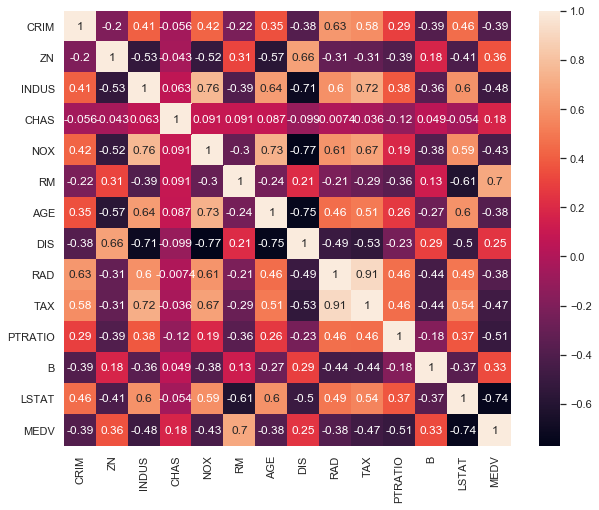

In [223]:
## plotting the correlation heat map

plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True)

In [224]:
corr_table = df2.corr()

In [225]:
corr_table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [227]:
## Creating the function in order to find the correlated columns with correlation value set to a particular threshold
## We are taking the absolute value of correlation, on the other hand the negatively correlated columns can be of importance
## and should not be dropped in some cases

def correlation(dataset, threshold):
    corr_colms = set()
    corr_tab = dataset.corr()
    for i in corr_tab.columns:
        for j in corr_tab.index:
            if i==j:
                break
            elif (abs(corr_tab[i][j]) > threshold):
                corr_colms.add((i))
    return corr_colms

In [228]:
## Calling the above function to identify columns with threshold greater then 70% 

corr_features = list(correlation(X_train2,0.7))

In [229]:
corr_features

['DIS', 'AGE', 'NOX', 'TAX']

We identified 4 columns which are highly correated (more then 70% in this case )

In [230]:
X_train2 = X_train2.drop(corr_features,axis=1)
X_test2 = X_test2.drop(corr_features,axis=1)

**Trying with big dataset now**

In [231]:
df3 = pd.read_csv('santander.csv', nrows=10000)

In [232]:
X3 = df3.drop(['TARGET'], axis=1)
y3 = df3['TARGET']

In [250]:
## Splitting to train and test dataset

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=0)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(7000, 370) (3000, 370) (7000,) (3000,)


In [251]:
## calling the correlation function and passing the correlation value at 90%

corr_features2 = list(correlation(X_train3,0.9))

In [252]:
len(corr_features2)

156

We identified 156 features with correlation value higher then 90%

In [253]:
## Dropping the above 156 highly correlated features from the train and test dataset

X_train3 = X_train3.drop(corr_features2,axis=1)
X_test3 = X_test3.drop(corr_features2,axis=1)

In [254]:
print(X_train3.shape, X_test3.shape)

(7000, 214) (3000, 214)
